In [11]:
import h5py
import matplotlib.pyplot as plt
import ast

def compute_number_of_n_exc(list_of_exc, order):
    n = 0
    for exc in list_of_exc:
        if len(exc[0]) == order:
            n += 1
    return n

In [12]:
def read_data(filename):
    print("\nReading:", filename)
    hf = h5py.File(filename, 'r')
    # for key in hf.attrs.keys():
    #     print(key, hf.attrs[key])
    e_exact = hf.attrs['e_exact']
    e_uccsd = hf.attrs['e_uccsd']
    print("UCCSD error, mHa:", (e_uccsd - e_exact)*1000)
    uccsd_n_params = hf.attrs['uccsd_n_params']
    e_nr = hf.attrs['e_nr']
    e = []
    thresh = []
    n_params = []
    n_iters = len(hf.keys())
    print("Number of USCC iterations:", n_iters)
    last_iter = "iter_" + str(n_iters)
    list_of_exc = hf[last_iter]["opt_params"].attrs.keys()
    params_dict = dict()

    # Dictionary with parameter values for every iteration
    for exc in list_of_exc:
        tmp_dict = dict()
        iters = []
        values = []
        for n in range(n_iters):
            cur_iter = 'iter_' + str(n+1)
                        
            if exc in hf[cur_iter]["opt_params"].attrs.keys():
                iters.append(n)
                values.append(hf[cur_iter]["opt_params"].attrs[exc])

        tmp_dict['values'] = values
        tmp_dict['iters'] = iters
        params_dict[exc] = tmp_dict.copy()
        
    # Data for every iteration
    for n in range(n_iters):
        iter = 'iter_' + str(n+1)
        e.append(hf[iter].attrs['e'])
        thresh.append(hf[iter].attrs['thresh'])
        n_params.append(len(hf[iter]['opt_params'].attrs.keys()))

    # Breakdown by excitation level
    n_singles = []
    n_doubles = []
    n_triples = []
    n_quad = []

    for n in range(n_iters):
        iter = 'iter_' + str(n+1)
        list_of_exc = [ast.literal_eval(exc) for exc in hf[iter]['opt_params'].attrs.keys()]
        n_singles.append(compute_number_of_n_exc(list_of_exc, 1))
        n_doubles.append(compute_number_of_n_exc(list_of_exc, 2))
        n_triples.append(compute_number_of_n_exc(list_of_exc, 3))
        n_quad.append(compute_number_of_n_exc(list_of_exc, 4))
    hf.close()
    print("{:>11s}{:>14s}{:>14s}{:>8s}{:>6s}{:>6s}{:>6s}{:>6s}".format(
        "Threshold", "Error, mHa", "dE, mHa", "Ntot", "S", "D", "T", "Q"))
    for n in range(n_iters):
        if n > 0:
            dE = (e[n]-e[n-1])*1000
        else:
            dE = 0
        print("{:>11.4e}{:>14.4e}{:>14.4e}{:>8d}{:>6d}{:>6d}{:>6d}{:>6d}".format(
            thresh[n], (e[n]-e_exact)*1000, dE, n_params[n], n_singles[n], n_doubles[n],
            n_triples[n], n_quad[n]))
    res = {"thresh":thresh, "e":e, "e_exact":e_exact, "n_params":n_params, "n_iters":n_iters, 
           "n_singles":n_singles, "n_doubles":n_doubles, "n_triples":n_triples, "n_quad":n_quad,
           'e_uccsd':e_uccsd, "uccsd_n_params": uccsd_n_params, "e_nr": e_nr}

    return res

Load hdf5 file for every molecule

In [13]:
# H6
res_h6_sym_r09 = read_data("hdf5/h6_lin_sym_r09.hdf5")
res_h6_sym_r18 = read_data("hdf5/h6_lin_sym_r18.hdf5")
res_h6_sym_r22 = read_data("hdf5/h6_lin_sym_r22.hdf5")
res_h6_sym_r36 = read_data("hdf5/h6_lin_sym_r36.hdf5")

res_h6_nonsym_r09 = read_data("hdf5/h6_lin_nonsym_r09.hdf5")
res_h6_nonsym_r18 = read_data("hdf5/h6_lin_nonsym_r18.hdf5")
res_h6_nonsym_r22 = read_data("hdf5/h6_lin_nonsym_r22.hdf5")
res_h6_nonsym_r36 = read_data("hdf5/h6_lin_nonsym_r36.hdf5")

# H2O
res_h2o_sym_r095 = read_data("hdf5/h2o_sym_r095.hdf5")
res_h2o_sym_r19 = read_data("hdf5/h2o_sym_r19.hdf5")
res_h2o_sym_r24 = read_data("hdf5/h2o_sym_r24.hdf5")

res_h2o_nonsym_r095 = read_data("hdf5/h2o_nonsym_r095.hdf5")
res_h2o_nonsym_r19 = read_data("hdf5/h2o_nonsym_r19.hdf5")
res_h2o_nonsym_r24 = read_data("hdf5/h2o_nonsym_r24.hdf5")

# BeH2
res_beh2_sym_r13 = read_data("hdf5/beh2_sym_r13.hdf5")
res_beh2_sym_r26 = read_data("hdf5/beh2_sym_r26.hdf5")
res_beh2_sym_r39 = read_data("hdf5/beh2_sym_r39.hdf5")

res_beh2_nonsym_r13 = read_data("hdf5/beh2_nonsym_r13.hdf5")
res_beh2_nonsym_r26 = read_data("hdf5/beh2_nonsym_r26.hdf5")
res_beh2_nonsym_r39 = read_data("hdf5/beh2_nonsym_r39.hdf5")


Reading: hdf5/h6_lin_sym_r09.hdf5
UCCSD error, mHa: 0.40519430170604664
Number of USCC iterations: 7
  Threshold    Error, mHa       dE, mHa    Ntot     S     D     T     Q
 4.0000e-02    3.7373e+01    0.0000e+00      16     8     8     0     0
 2.0000e-02    1.0891e+01   -2.6482e+01      37     8    29     0     0
 1.0000e-02    2.0376e+00   -8.8533e+00      61     8    43    10     0
 5.0000e-03    3.2098e-01   -1.7166e+00      89     8    49    30     2
 2.0000e-03    3.8452e-02   -2.8253e-01     141     8    51    66    16
 1.0000e-03    1.8525e-02   -1.9927e-02     178     8    51    78    41
 5.0000e-04    1.1791e-04   -1.8407e-02     190     8    51    80    51

Reading: hdf5/h6_lin_sym_r18.hdf5
UCCSD error, mHa: 9.83239336748909
Number of USCC iterations: 5
  Threshold    Error, mHa       dE, mHa    Ntot     S     D     T     Q
 4.0000e-02    1.2174e+02    0.0000e+00      21     6    15     0     0
 2.0000e-02    1.0954e+01   -1.1078e+02      63     8    43    10     2
 1.0000

In [14]:
def plot_mol(ax, results, labels, title, markers, color, plot_axislabel_x=True, plot_axislabel_y=True):
    
    left = min(min([results[n]['n_params'][0] for n in range(len(results))]),
               results[0]['uccsd_n_params'])
    right = max(max([results[n]['n_params'][-1] for n in range(len(results))]),
                results[0]['uccsd_n_params'])
    xs = [left-5, right+5]
    ys = [1.6, 1.6]

    ax.fill_between(xs, ys, interpolate=True, color='gray', alpha=0.2)
    for n in range(len(results)):
        error = (results[n]['e'] - results[n]['e_exact']) * 1000
        error_uccsd = (results[n]['e_uccsd'] - results[n]['e_exact']) * 1000
        ax.plot(results[n]['n_params'], error, linewidth=2, marker=markers[n],
                label=labels[n], color=colors[n], markersize=9)
        if n== 0:
            ax.scatter(results[n]['uccsd_n_params'], error_uccsd, marker='*',
                       edgecolor='black', label='UCCSD', s=300, color=colors[n])
        else:
           ax.scatter(results[n]['uccsd_n_params'], error_uccsd, marker='*',
                      edgecolor='black', s=300, color=colors[n]) 
    ax.set_title(title)
    ax.set_yscale('log')
    if plot_axislabel_x:
        ax.set_xlabel("Number of parameters")
    if plot_axislabel_y:
        ax.set_ylabel("$E - E_{FCI}$, mHa")
    ax.set_xlim([left-5, right+5])
    ax.legend()

Plotting all 6 molecules in one plot (Figure 2 in the paper)

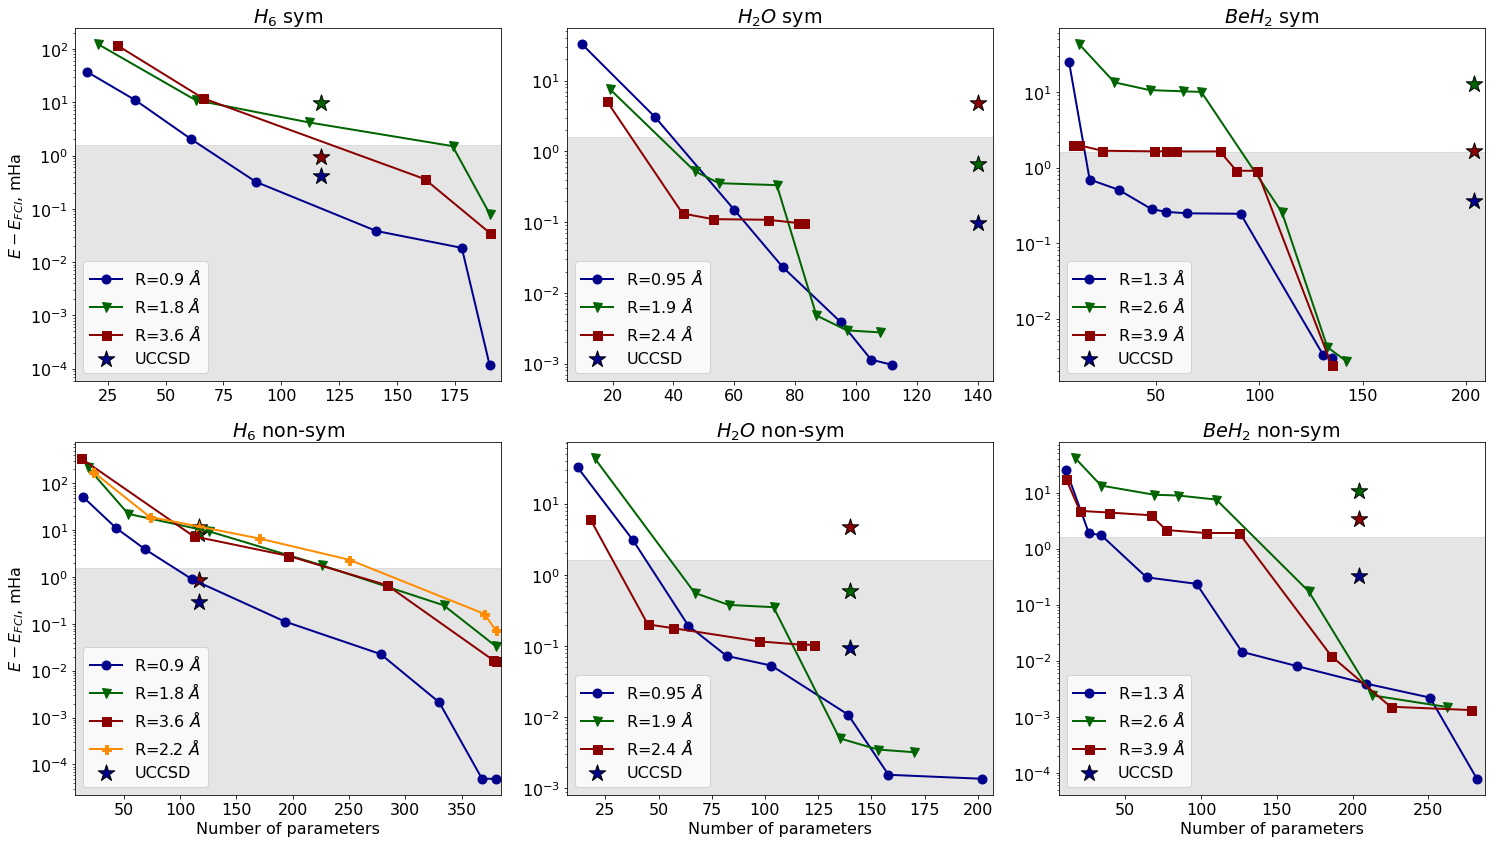

In [15]:
font = {'size'   : 16}
plt.rc('font', **font)

fig = plt.figure(figsize=[21,12])
ax1 = plt.subplot(231)
ax2 = plt.subplot(234)
ax3 = plt.subplot(232)
ax4 = plt.subplot(235)
ax5 = plt.subplot(233)
ax6 = plt.subplot(236)

colors = ['darkblue', 'darkgreen', 'darkred', 'darkorange']
markers = ["o", "v", 's', 'P']

# H6 sym
results = [res_h6_sym_r09, res_h6_sym_r18, res_h6_sym_r36]
labels = ['R=0.9 $\AA$', 'R=1.8 $\AA$', 'R=3.6 $\AA$', 'R=2.2 $\AA$']
title = "$H_6$ sym"
plot_mol(ax1, results, labels, title, markers, colors, plot_axislabel_x=False)

# H6 nonsym
results = [res_h6_nonsym_r09, res_h6_nonsym_r18, res_h6_nonsym_r36, res_h6_nonsym_r22]
labels = ['R=0.9 $\AA$', 'R=1.8 $\AA$', 'R=3.6 $\AA$', 'R=2.2 $\AA$']
title = "$H_6$ non-sym"
plot_mol(ax2, results, labels, title, markers, colors)

# H2O sym
results = [res_h2o_sym_r095, res_h2o_sym_r19, res_h2o_sym_r24]
title = "$H_2O$ sym"
labels = ['R=0.95 $\AA$', 'R=1.9 $\AA$', 'R=2.4 $\AA$']
plot_mol(ax3, results, labels, title, markers, colors, plot_axislabel_x=False, plot_axislabel_y=False)

# H2O nonsym
results = [res_h2o_nonsym_r095, res_h2o_nonsym_r19, res_h2o_nonsym_r24]
title = "$H_2O$ non-sym"
labels = ['R=0.95 $\AA$', 'R=1.9 $\AA$', 'R=2.4 $\AA$']
plot_mol(ax4, results, labels, title, markers, colors, plot_axislabel_y=False)

# BeH2 sym 
results = [res_beh2_sym_r13, res_beh2_sym_r26, res_beh2_sym_r39]
title = "$BeH_2$ sym"
labels = ['R=1.3 $\AA$', 'R=2.6 $\AA$', 'R=3.9 $\AA$']
plot_mol(ax5, results, labels, title, markers, colors, plot_axislabel_x=False, plot_axislabel_y=False)

# BeH2 nonsym 
results = [res_beh2_nonsym_r13, res_beh2_nonsym_r26, res_beh2_nonsym_r39]
title = "$BeH_2$ non-sym"
labels = ['R=1.3 $\AA$', 'R=2.6 $\AA$', 'R=3.9 $\AA$']
plot_mol(ax6, results, labels, title, markers, colors, plot_axislabel_y=False)

ax1.get_shared_x_axes().join(ax1, ax2)
ax3.get_shared_x_axes().join(ax3, ax4)
ax5.get_shared_x_axes().join(ax5, ax6)
ax1.get_shared_y_axes().join(ax1, ax2, ax3)
ax4.get_shared_y_axes().join(ax4, ax5, ax6)

plt.tight_layout()
plt.savefig("USCCSDTQ_6mol.png", dpi=300)